In the graph above, the two lines represent the linear equations:

#### 1 :  2x+y=4 (in blue)
#### 2 :  x−y=1 (in red)

The blue point represents a solution from line 1 (at 𝑥 = 2x=2).
 To project this point onto the second line (line 2), we use vector projection. The green point represents the projection of the blue point onto line 2.

In summary, projecting a point onto a line means finding the closest point on that line to the given point. This method is often used in optimization algorithms, like in your case, where the projected result is used to refine the solution across constraints.

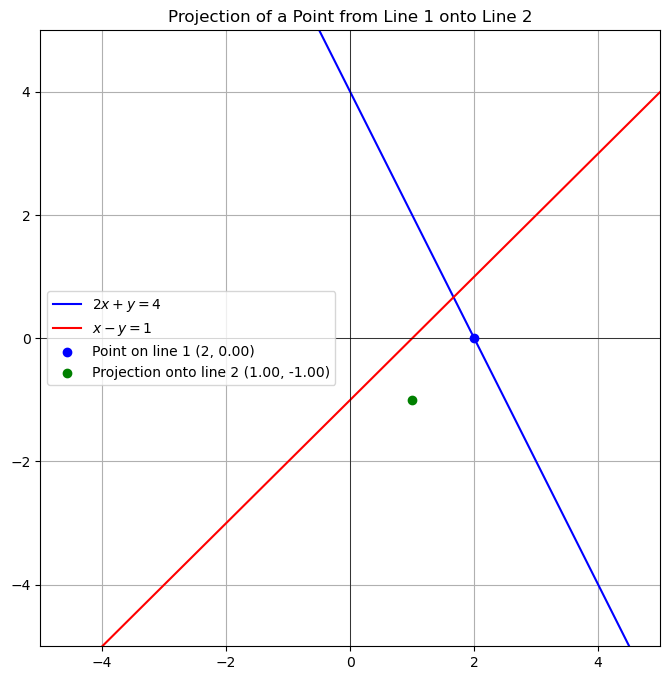

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of linear equations
# Equation 1: 2x + y = 4 (represented as ax + by = c)
a1, b1, c1 = 2, 1, 4

# Equation 2: x - y = 1 (represented as ax + by = c)
a2, b2, c2 = 1, -1, 1

# Create a grid of x values
x_vals = np.linspace(-5, 5, 400)

# Calculate the corresponding y values for each equation
y_vals_1 = (c1 - a1 * x_vals) / b1  # For equation 1
y_vals_2 = (c2 - a2 * x_vals) / b2  # For equation 2

# To simulate projection, solve each equation and then project one solution onto the other line
# Here we'll choose arbitrary points from each line and project one onto the other
# Take a point from line 1 (e.g., x = 2)
x1, y1 = 2, (c1 - a1 * 2) / b1  # Point on line 1

# Projection of this point onto line 2 (using the formula for projection onto a line)
# A line can be represented as a vector and projection of a point onto the line follows vector projection rules.
line_2_vec = np.array([a2, b2])  # The direction vector of line 2
point_vec = np.array([x1, y1])  # The point from line 1
line_2_unit_vec = line_2_vec / np.linalg.norm(line_2_vec)  # Normalize the vector
projection_length = np.dot(point_vec, line_2_unit_vec)  # Project the point onto the line
projected_point = projection_length * line_2_unit_vec  # Projected point coordinates

# Plotting the equations and the projection
plt.figure(figsize=(8, 8))
plt.plot(x_vals, y_vals_1, label=r'$2x + y = 4$', color='blue')  # Line 1
plt.plot(x_vals, y_vals_2, label=r'$x - y = 1$', color='red')    # Line 2

# Plot the original point from line 1
plt.scatter(x1, y1, color='blue', zorder=5, label=f'Point on line 1 (2, {y1:.2f})')

# Plot the projected point onto line 2
plt.scatter(*projected_point, color='green', zorder=5, label=f'Projection onto line 2 ({projected_point[0]:.2f}, {projected_point[1]:.2f})')

# Add labels, title and grid
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('Projection of a Point from Line 1 onto Line 2')
plt.legend()
plt.show()


Pour résoudre un système d'équations linéaires avec des agents, on peut utiliser des techniques de calcul distribué ou algorithmes itératifs distribués. Chaque agent possède une partie de l'information (ici, une équation), et ils vont coopérer pour trouver la solution globale sans avoir une vue complète de toutes les équations.

In [5]:
import numpy as np

A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

x = np.random.rand(3)  # x1, x2, x3 initialisés aléatoirement

# Paramètres pour l'algorithme itératif
tolerance = 1e-6
max_iterations = 1000
alpha = 0.9

print("Les valeurs initiales des inconnues sont", x)

def KacZmarg(matrice_A, matrice_b, inconnue, max_iterations, alpha, tolerance):
    n = len(matrice_b)
    for iteration in range(max_iterations):
        x_old = inconnue.copy()  # Conserver les anciennes valeurs pour la vérification de convergence
        for i in range(n):
            transposer_a = 0
            norme = 0
            # Boucle à travers chaque élément de la ligne
            for j, element in enumerate(matrice_A[i]):
                transposer_a += element * inconnue[j]  # On utilise j comme index ici
                norme += element * element
                #print(f"Inconnue[{j}] = {inconnue[j]}")
            # Mise à jour de l'inconnue
            inconnue += alpha * (matrice_b[i] - transposer_a) / norme * matrice_A[i]
        
        # Vérifier la convergence
        if np.linalg.norm(inconnue - x_old) < tolerance:
            #print(f"Convergence atteinte après {iteration+1} itérations.")
            loop = iteration
            break
    
    
    
    
    return inconnue,loop

# Appliquer l'algorithme de Kaczmarz
resultat,iter = KacZmarg(A, b, x, max_iterations, alpha, tolerance)

print("Le résultat final des inconnues est :", resultat,iter)

Les valeurs initiales des inconnues sont [0.35401149 0.46659325 0.52925547]


NameError: name 'iteration' is not defined

In [1]:
import numpy as np

def generer_systeme_lineaire(nb_variables, nb_equations):
    """
    Génère un système linéaire valide (A, b) de nb_equations équations et nb_variables variables.
    """
    # 1. Générer une solution aléatoire
    solution = np.random.randint(-10, 10, size=(nb_variables, 1))
    
    # 2. Générer une matrice A de taille nb_equations x nb_variables avec un rang maximal
    while True:
        A = np.random.randint(-10, 10, size=(nb_equations, nb_variables))
        # Vérifier que le rang est maximal (pour garantir l'indépendance linéaire)
        if np.linalg.matrix_rank(A) == nb_variables:
            break
    
    # 3. Calculer le vecteur constant b pour garantir que le système a une solution
    b = A @ solution
    
    return A, b, solution

# Exemple d'utilisation :
nb_variables = 3
nb_equations = 3
A, b, solution = generer_systeme_lineaire(nb_variables, nb_equations)

print("Matrice des coefficients A :")
print(A)
print("\nVecteur constant b :")
print(b)
print("\nSolution générée :")
print(solution)


Matrice des coefficients A :
[[ -8  -3  -1]
 [ -9  -2  -8]
 [-10   8  -3]]

Vecteur constant b :
[[61]
 [26]
 [-3]]

Solution générée :
[[-6]
 [-6]
 [ 5]]


In [4]:
import numpy as np

def generate_linear_systems(num_systems, matrix_size, min_val=-10, max_val=10):
    """
    Génère un ensemble de systèmes linéaires de la forme Ax = b.

    Parameters:
    - num_systems (int): Le nombre de systèmes linéaires à générer.
    - matrix_size (int): La taille de la matrice carrée A (ex. 3 pour une matrice 3x3).
    - min_val (int): La valeur minimale pour les éléments de A et b (défaut: -10).
    - max_val (int): La valeur maximale pour les éléments de A et b (défaut: 10).

    Returns:
    - List[Tuple[np.ndarray, np.ndarray]]: Une liste de tuples où chaque tuple contient
      une matrice A et un vecteur b pour un système linéaire.
    """
    systems = []
    for _ in range(num_systems):
        # Génère une matrice A de taille `matrix_size` x `matrix_size` avec des valeurs aléatoires
        A = np.random.randint(min_val, max_val, size=(matrix_size, matrix_size))
        
        # Vérifie si la matrice est inversible (i.e. déterminant non nul)
        if np.linalg.det(A) == 0:
            # Si non inversible, on régénère la matrice A
            while np.linalg.det(A) == 0:
                A = np.random.randint(min_val, max_val, size=(matrix_size, matrix_size))
        
        # Génère un vecteur b de taille `matrix_size` avec des valeurs aléatoires
        b = np.random.randint(min_val, max_val, size=(matrix_size,))
        
        systems.append((A, b))
    
    return systems

# Exemple d'utilisation : génère 5 systèmes linéaires de matrices 3x3
systems = generate_linear_systems(num_systems=5, matrix_size=3)
for i, (A, b) in enumerate(systems):
    print(f"Système {i+1}:")
    print("A =\n", A)
    print("b =", b)
    print("-" * 30)


Système 1:
A =
 [[-8 -4  4]
 [ 0 -2  6]
 [ 9 -8 -4]]
b = [4 3 1]
------------------------------
Système 2:
A =
 [[  3   0  -8]
 [  4   2  -7]
 [  8   9 -10]]
b = [6 9 0]
------------------------------
Système 3:
A =
 [[  1   1  -1]
 [ -3   3   6]
 [  7 -10   3]]
b = [-1 -7 -5]
------------------------------
Système 4:
A =
 [[  2   9  -6]
 [  5   1  -2]
 [ -9 -10   0]]
b = [-1  7  5]
------------------------------
Système 5:
A =
 [[ 8 -3 -8]
 [-8 -1 -8]
 [ 2  0 -6]]
b = [-6  1 -2]
------------------------------


In [2]:
import numpy as np
import json
import os

# Dossier pour stocker les graphiques
if not os.path.exists("graphs"):
    os.makedirs("graphs")

# Nombre de systèmes à générer
num_systems = 7
systems = []


# Génération de systèmes de taille croissante et stockage
for i in range(3, 10):
    A = np.random.rand(i, i)
    b = np.random.rand(i)

    # Stockage des données dans un dictionnaire
    system_data = {
        "A": A.tolist(),
        "b": b.tolist(),
        "solution": solution.tolist(),
    }
    systems.append(system_data)

# Stockage de tous les systèmes dans un fichier JSON
with open("systems_data.json", "w") as f:
    json.dump(systems, f, indent=4)

print("Les systèmes et les graphiques associés ont été stockés avec succès.")


Les systèmes et les graphiques associés ont été stockés avec succès.


In [14]:
import numpy as np
n = 2

# res = np.random.rand(2,1)
# np.ones((n, n))
# print(np.ones((n, n)))

max_iterations = 6
cons_err2 = np.zeros((max_iterations+1,n))
print(cons_err2)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [18]:
A = np.random.rand(n, n)
print(A)
size = A.shape[0]
print(size)

[[0.93467477 0.84926333]
 [0.7990969  0.24156699]]
2


C:\Users\t-lab\AppData\Local\Temp\ipykernel_13860\301913395.py:67: RuntimeWarning: overflow encountered in multiply
  X_i[:, i] = X_i[:, i] + step[i] * (Y[:, i] - X_i[:, i])
C:\Users\t-lab\AppData\Local\Temp\ipykernel_13860\301913395.py:29: RuntimeWarning: invalid value encountered in subtract
  disagree[i] = max(disagree[i], np.linalg.norm(X[:, i] - X[:, j]))
C:\Users\t-lab\AppData\Local\Temp\ipykernel_13860\301913395.py:8: RuntimeWarning: invalid value encountered in subtract
  return x - (np.dot(A, x) - b) / max(np.dot(A, A.T), 1e-9) * A
C:\Users\t-lab\AppData\Local\Temp\ipykernel_13860\301913395.py:66: RuntimeWarning: overflow encountered in scalar multiply
  step[i] = 1.5 * step[i]


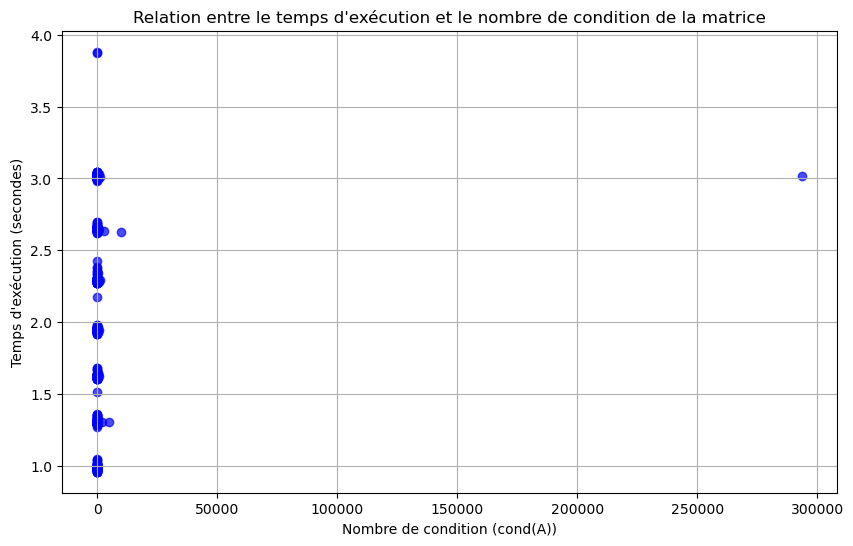

In [1]:
import numpy as np
import json
import time
import matplotlib.pyplot as plt

# Projection utilisée dans l'algorithme
def projection(A, b, x):
    return x - (np.dot(A, x) - b) / max(np.dot(A, A.T), 1e-9) * A

# Fonction pour générer une matrice de pondération W (symétrique)
def matrice_W(n):
    W = np.eye(n) * 0.5
    for i in range(n - 1):
        W[i, i + 1] = 0.25
        W[i + 1, i] = 0.25
    return W

# Fonction calculant les erreurs locales
def local_error(A, b, X, W, n):
    err = np.zeros(n)
    disagree = np.zeros(n)

    for i in range(n):
        err[i] = abs(np.dot(A[i, :], X[:, i]) - b[i])

    for i in range(n):
        for j in range(n):
            if W[i, j] > 0.0:
                disagree[i] = max(disagree[i], np.linalg.norm(X[:, i] - X[:, j]))
    return err, disagree

# Algorithme principal
def inertial_projected_consensus_algorithm(A, b, max_iterations=10000, tol=1e-5):
    n = len(b)
    X_init = 2.0 * np.random.rand(n, n) - np.ones((n, n))
    X_i = X_init
    Y = np.zeros((n, n))
    W = matrice_W(n)
    theta = np.zeros(n)
    step = np.full(n, float('inf'))
    eps = 1e-9

    iter = 0
    eqn_err, cons_err = np.inf, np.inf
    while iter < max_iterations:
        iter += 1
        for i in range(n):
            X_i[:, i] = projection(A[i, :].T, b[i], X_i[:, i])
        X_i = np.dot(X_i, W)

        for i in range(n):
            Y[:, i] = projection(A[i, :].T, b[i], X_i[:, i])
        Y = np.dot(Y, W)

        for i in range(n):
            if abs(np.dot(A[i, :], Y[:, i] - X_i[:, i])) < eps:
                theta[i] = float('inf')
            else:
                theta[i] = (np.dot(A[i, :], X_i[:, i]) - b[i]) / np.dot(A[i, :], X_i[:, i] - Y[:, i])

        for i in range(n):
            for j in range(n):
                if W[i, j] > 0.0 and theta[j] > eps and theta[j] < step[i]:
                    step[i] = theta[j]
            if step[i] < float('inf'):
                step[i] = 1.5 * step[i]
                X_i[:, i] = X_i[:, i] + step[i] * (Y[:, i] - X_i[:, i])
        X_i = np.dot(X_i, W)

        eqn_err, cons_err = local_error(A, b, X_i, W, n)
        if max(eqn_err) < tol and max(cons_err) < tol:
            break

    return iter

# Chargement des données JSON
with open("../ressource/System_of_linear_equations/systems_data_3x3_to_10x10.json", "r") as f:
    systems_data = json.load(f)

# Variables pour stocker les résultats
condition_numbers = []
execution_times = []

# Boucle sur tous les systèmes dans le fichier JSON
for system in systems_data:
    A = np.array(system["A"])
    b = np.array(system["b"])

    # Calcul du nombre de condition de A
    cond_number = np.linalg.cond(A)
    condition_numbers.append(cond_number)

    # Mesure du temps d'exécution
    start_time = time.time()
    inertial_projected_consensus_algorithm(A, b)
    exec_time = time.time() - start_time
    execution_times.append(exec_time)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(condition_numbers, execution_times, color="blue", alpha=0.7)
plt.title("Relation entre le temps d'exécution et le nombre de condition de la matrice")
plt.xlabel("Nombre de condition (cond(A))")
plt.ylabel("Temps d'exécution (secondes)")
plt.grid(True)
plt.show()


Converged in 22 iterations


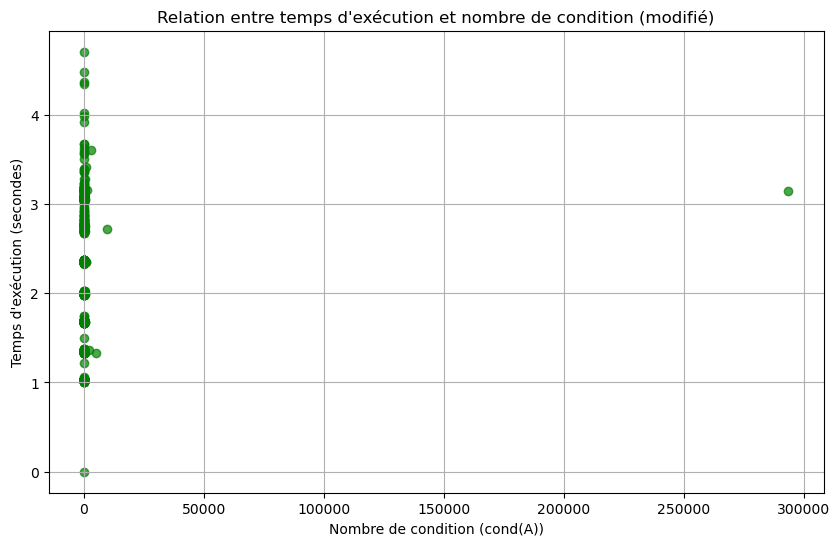

In [4]:
import numpy as np
import json
import time
import matplotlib.pyplot as plt

# Fonction de projection utilisée dans l'algorithme
def projection(A, b, x):
    return x - (np.dot(A, x) - b) / max(np.dot(A, A.T), 1e-9) * A

# Fonction pour générer une matrice de pondération W (symétrique)
def matrice_W(n):
    W = np.eye(n) * 0.5
    for i in range(n - 1):
        W[i, i + 1] = 0.25
        W[i + 1, i] = 0.25
    return W

# Fonction de convergence
def has_converged(x, x_old, tolerance):
    return np.linalg.norm(x - x_old) < tolerance

# Algorithme principal modifié
def inertial_projected_consensus_algorithm_modified(A, b, max_iterations=10000, tol=1e-5):
    n = len(b)
    X_init = 2.0 * np.random.rand(n, n) - np.ones((n, n))
    X_i = X_init
    X_old = np.copy(X_i)
    Y = np.zeros((n, n))
    W = matrice_W(n)
    theta = np.zeros(n)
    step = np.full(n, float('inf'))
    eps = 1e-9

    # Calcul du nombre de condition
    cond_number = np.linalg.cond(A)
    iter = 0
    
    eqn_err, cons_err = np.inf, np.inf
    while iter < max_iterations:
        iter += 1
        
        # Mise à jour de X
        for i in range(n):
            X_i[:, i] = projection(A[i, :].T, b[i], X_i[:, i])
        X_i = np.dot(X_i, W)

        # Mise à jour de Y
        for i in range(n):
            Y[:, i] = projection(A[i, :].T, b[i], X_i[:, i])
        Y = np.dot(Y, W)

        # Calcul des paramètres theta
        for i in range(n):
            if abs(np.dot(A[i, :], Y[:, i] - X_i[:, i])) < eps:
                theta[i] = float('inf')
            else:
                theta[i] = (np.dot(A[i, :], X_i[:, i]) - b[i]) / np.dot(A[i, :], X_i[:, i] - Y[:, i])

        # Mise à jour de step et de X
        for i in range(n):
            for j in range(n):
                if W[i, j] > 0.0 and theta[j] > eps and theta[j] < step[i]:
                    step[i] = theta[j]
            if step[i] < float('inf'):
                step[i] = 1.5 * step[i]
                X_i[:, i] = X_i[:, i] + step[i] * (Y[:, i] - X_i[:, i])
        X_i = np.dot(X_i, W)

        # Vérification de la convergence locale
        eqn_err, cons_err = local_error(A, b, X_i, W, n)

        # Arrêt anticipé basé sur la convergence des itérations
        if has_converged(X_i, X_old, tol):
            print(f"Converged in {iter} iterations")
            break
        X_old = np.copy(X_i)  # Mettre à jour X_old pour la prochaine itération

        # Arrêt basé sur la convergence globale
        if max(eqn_err) < tol and max(cons_err) < tol:
            print(f"Converged in {iter} iterations (global tolerance reached)")
            break

    return iter

# Chargement des données JSON
with open("../ressource/System_of_linear_equations/systems_data_3x3_to_10x10.json", "r") as f:
    systems_data = json.load(f)

# Visualisation de la relation entre temps d'exécution et condition number
condition_numbers = []
execution_times = []

for system in systems_data:
    A = np.array(system["A"])
    b = np.array(system["b"])
    
    # Calcul du nombre de condition
    cond_number = np.linalg.cond(A)
    
    if cond_number > 500:
        pass
    
    condition_numbers.append(cond_number)

    # Mesure du temps d'exécution
    start_time = time.time()
    inertial_projected_consensus_algorithm_modified(A, b)
    exec_time = time.time() - start_time
    execution_times.append(exec_time)
    print("execution_times:",execution_times,"condition_numbers:",condition_numbers,"iteration",inertial_projected_consensus_algorithm_modified)
# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(condition_numbers, execution_times, color="green", alpha=0.7)
plt.title("Relation entre temps d'exécution et nombre de condition (modifié)")
plt.xlabel("Nombre de condition (cond(A))")
plt.ylabel("Temps d'exécution (secondes)")
plt.grid(True)
plt.show()
